In [59]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix

In [82]:
dfs = [] #for PCA features
dfs.append(pd.read_csv(r"our_input_30/global_pca3.csv"))
# dfs.append(pd.read_csv(r"our_input_subject2/global_pca3.csv"))
for df in dfs:
    df.columns = list(range(len(df.columns)))
data= pd.concat([df for df in dfs], axis=0).reset_index(drop=True) 

In [83]:
data

,0,1,2,3
0,5.186696,-0.282449,0.381666,0.0
1,2.270144,0.922515,0.177721,0.0
2,7.351414,-0.815896,0.684039,0.0
3,7.281085,-0.349993,0.809293,0.0
4,8.960811,-0.766667,1.061026,0.0
...,...,...,...,...
212,0.247641,0.351363,-0.309008,6.0
213,1.826329,0.038614,-0.071972,6.0
214,0.220924,-0.118857,-0.455476,6.0
215,-0.570330,1.030801,-0.176771,6.0


In [84]:
y = data[3].copy() # for features 3PC
X = data.drop(3, axis = 1).copy()

In [85]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [86]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state = 100)

In [87]:
inputs = tf.keras.Input(shape = (X.shape[1], ))
x = tf.keras.layers.Dense(1024, activation = 'relu')(inputs)
x = tf.keras.layers.Dropout(0.4)(x)
x = tf.keras.layers.Dense(512, activation = 'relu')(x)
x = tf.keras.layers.Dropout(0.2)(x)
x = tf.keras.layers.Dense(512, activation = 'sigmoid')(x)
x = tf.keras.layers.Dropout(0.4)(x)
outputs = tf.keras.layers.Dense(7, activation = 'softmax')(x)

model = tf.keras.Model(inputs, outputs)

model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

batch_size = 32
epochs = 30 #30 before

history = model.fit(
    X_train,
    y_train,
    validation_split = 0.2,
    batch_size = batch_size,
    epochs = epochs,
    callbacks = [
        tf.keras.callbacks.ReduceLROnPlateau()
    ]
)

Epoch 1/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 112ms/step - accuracy: 0.1462 - loss: 2.2228 - val_accuracy: 0.1935 - val_loss: 1.9535 - learning_rate: 0.0010
Epoch 2/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.2292 - loss: 1.9458 - val_accuracy: 0.3548 - val_loss: 1.7599 - learning_rate: 0.0010
Epoch 3/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.3406 - loss: 1.7333 - val_accuracy: 0.3226 - val_loss: 1.5971 - learning_rate: 0.0010
Epoch 4/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.4058 - loss: 1.5282 - val_accuracy: 0.3226 - val_loss: 1.4488 - learning_rate: 0.0010
Epoch 5/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.4635 - loss: 1.2423 - val_accuracy: 0.3226 - val_loss: 1.3480 - learning_rate: 0.0010
Epoch 6/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.5379 - loss: 1.1158 - val_accuracy: 0.3548 - val_loss: 1.2834 - learning_rate: 0.0010
Epoch 7/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.5392 - loss: 1.0662 - val_accuracy: 0.4516

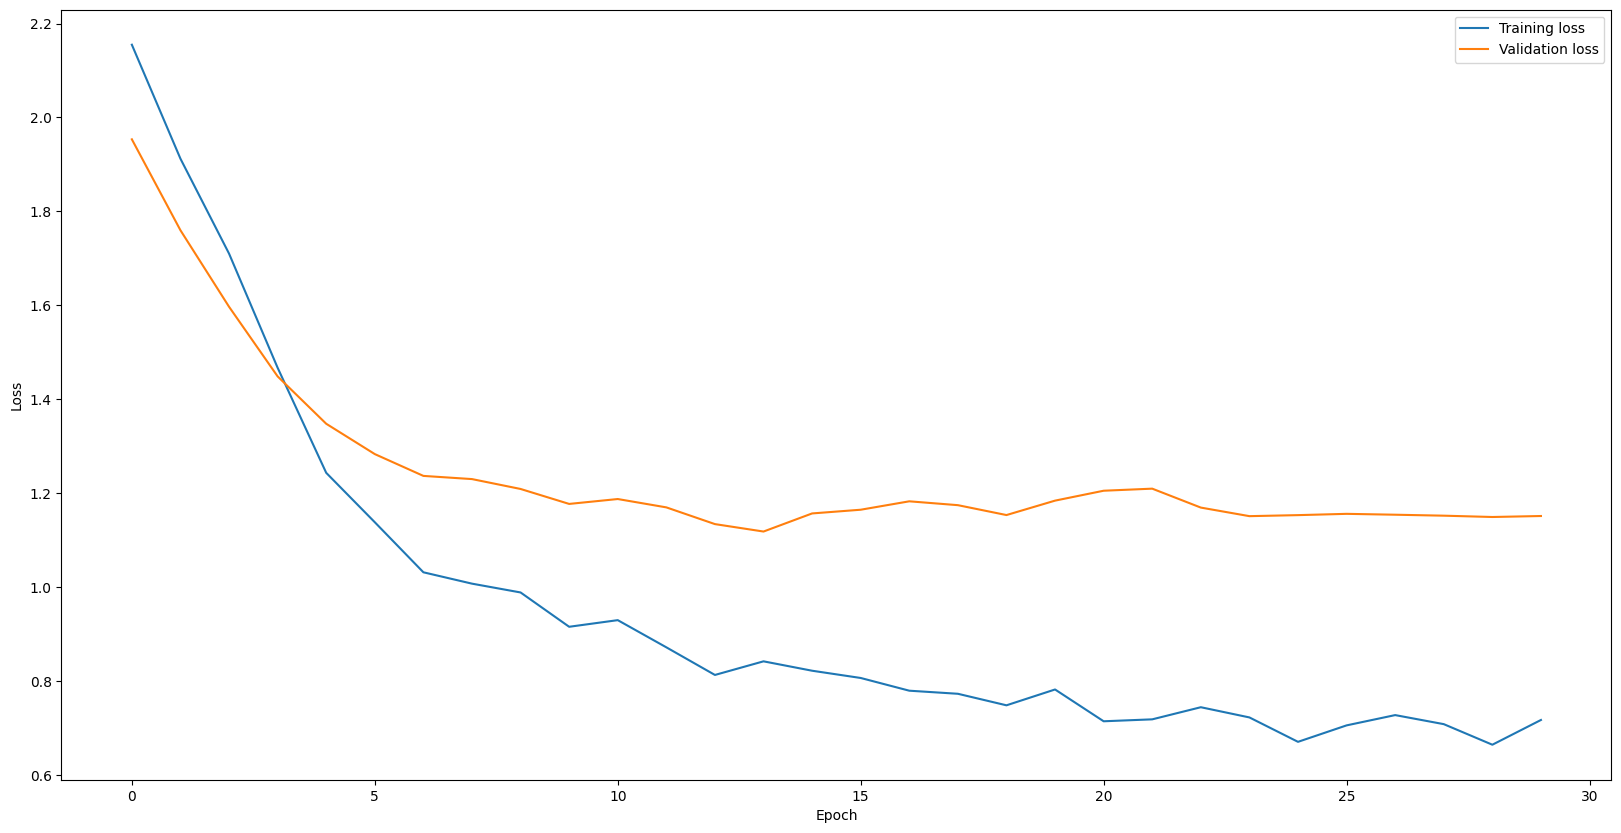

In [88]:
plt.figure(figsize = (20, 10))

plt.plot(range(epochs), history.history['loss'], label = 'Training loss')
plt.plot(range(epochs), history.history['val_loss'], label = 'Validation loss')

plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [89]:
model.evaluate(X_test, y_test)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5071 - loss: 1.0492


[0.9838666915893555, 0.5454545617103577]

In [90]:
y_true = np.array(y_test)
y_pred = np.array(list(map(lambda x : np.argmax(x), model.predict(X_test))))

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


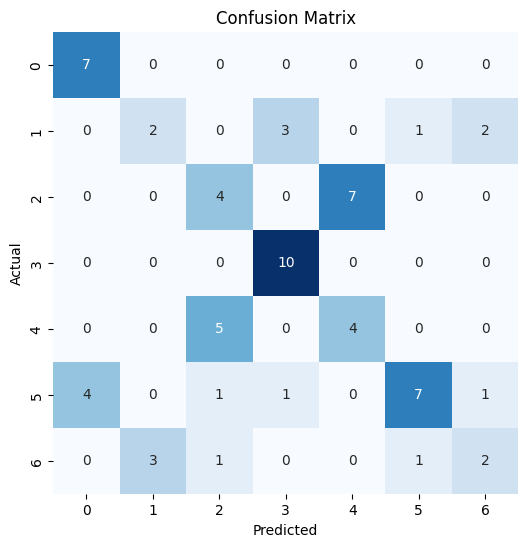

In [91]:
cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize = (6, 6))
sns.heatmap(cm, annot = True, fmt = 'g', cmap = 'Blues', cbar = False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [92]:
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

         0.0       0.64      1.00      0.78         7
         1.0       0.40      0.25      0.31         8
         2.0       0.36      0.36      0.36        11
         3.0       0.71      1.00      0.83        10
         4.0       0.36      0.44      0.40         9
         5.0       0.78      0.50      0.61        14
         6.0       0.40      0.29      0.33         7

    accuracy                           0.55        66
   macro avg       0.52      0.55      0.52        66
weighted avg       0.54      0.55      0.53        66

